# Customer Segmentation Using Credit Card Data Via K-Means Clustering
This project focuses on customer segmentation using credit card usage data. The goal is to group credit card users based on their spending behavior, credit utilization patterns, and payment habits. By identifying customer clusters, financial institutions can design better marketing strategies, customize credit card products, and improve customer retention.

# Importing Libraries and Creating Dataset
Importing Standard Libraries for creating graphs and for working with dataset.

The dataset used is CC GENERAL.csv, which contains 17 numerical attributes describing customer behaviors such as balance, purchases, cash advance usage, credit limit, and payment patterns.
The main objective is to perform unsupervised learning using K-Means clustering to uncover distinct groups of credit card users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('CC GENERAL.csv')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Data Cleaning & Preprocessing
Before clustering, several preprocessing steps were necessary.
    Handling Missing Values:
    Two features had missing values: MINIMUM_PAYMENTS & CREDIT_LIMIT
    These were imputed using their median values, since the distribution was skewed.
Dropping Non-Numerical Columns:
    CUST_ID was removed because it does not contribute to clustering.
Feature Scaling:
    All numerical features were standardized using StandardScaler.
    Clustering algorithms like K-Means are distance-based, so scaling ensures no feature dominates due to its magnitude.

In [3]:
cleaned_df=df.drop('CUST_ID', axis=1)
cleaned_df['CREDIT_LIMIT'].fillna(cleaned_df['CREDIT_LIMIT'].median(), inplace=True)
cleaned_df['MINIMUM_PAYMENTS'].fillna(cleaned_df['MINIMUM_PAYMENTS'].median(), inplace=True)
cleaned_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(cleaned_df)
df_scaled = pd.DataFrame(scaled_df, columns=cleaned_df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


# Exploratory Data Analysis (EDA)

A brief statistical summary was generated to understand the data distribution.
Basic plots used in EDA:
Histograms for spending vs. payments
, Count distribution of credit limits
, Correlation checks

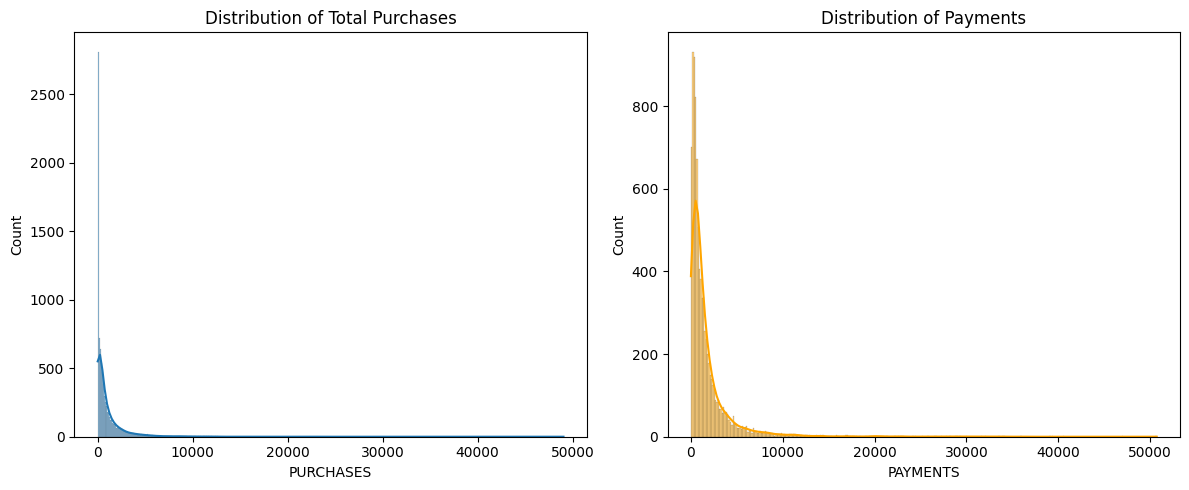

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(cleaned_df['PURCHASES'], kde=True)
plt.title("Distribution of Total Purchases")

plt.subplot(1,2,2)
sns.histplot(cleaned_df['PAYMENTS'], kde=True, color='orange')
plt.title("Distribution of Payments")

plt.tight_layout()
plt.show()


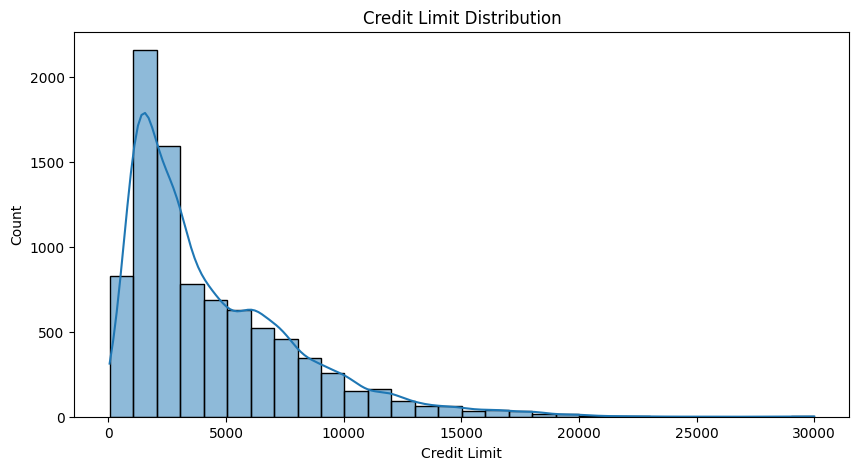

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(cleaned_df['CREDIT_LIMIT'], bins=30, kde=True)
plt.title("Credit Limit Distribution")
plt.xlabel("Credit Limit")
plt.ylabel("Count")
plt.show()

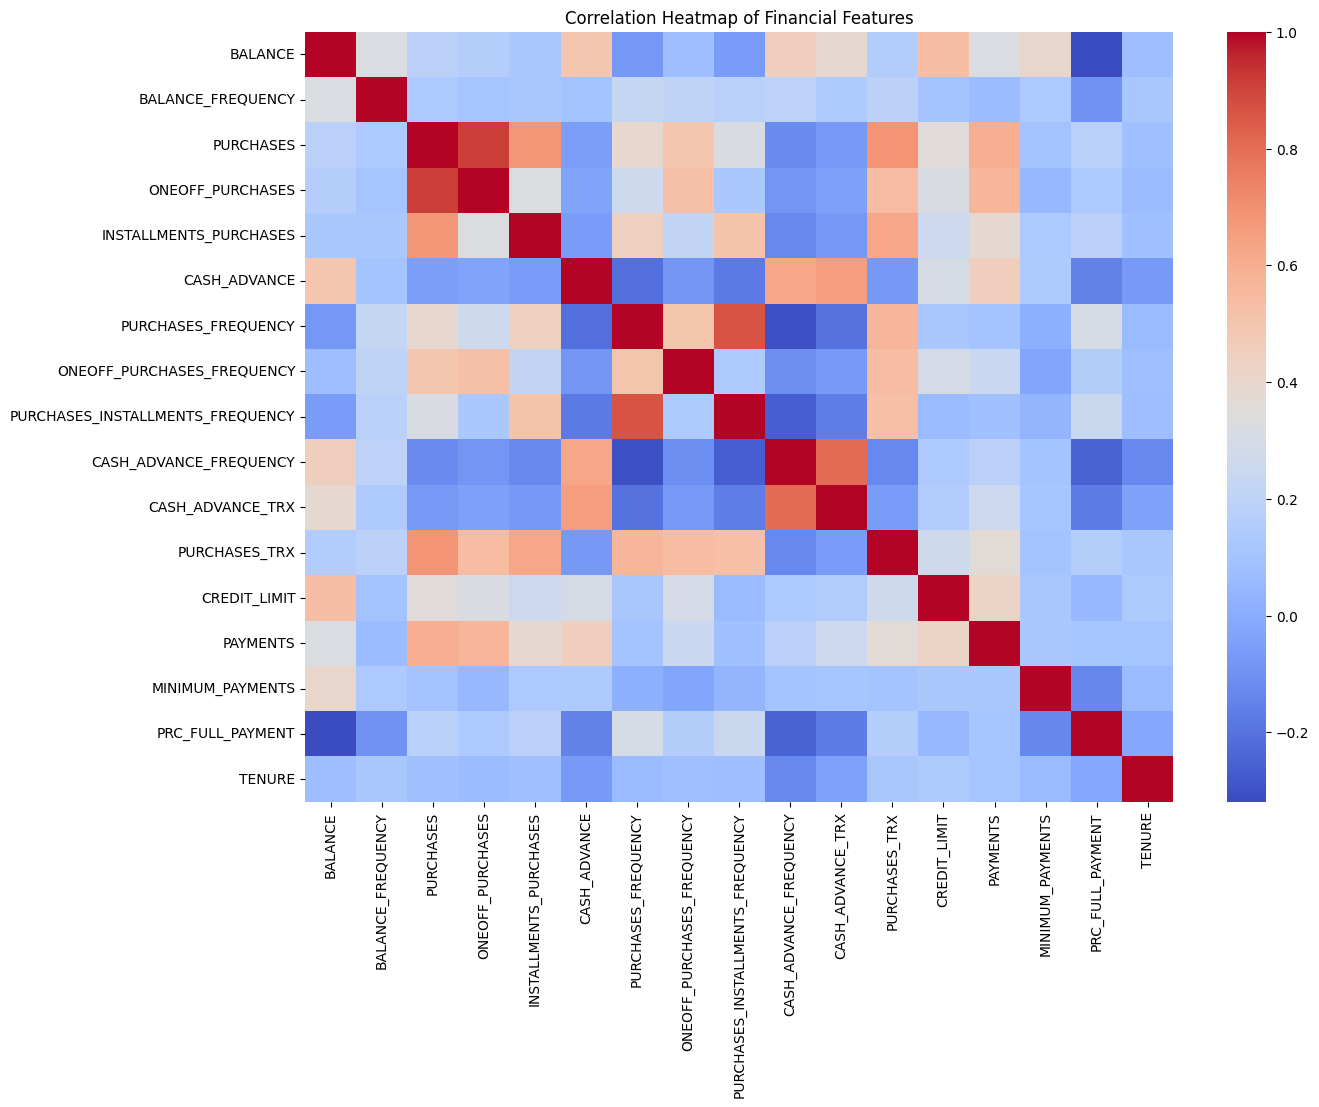

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(cleaned_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Financial Features")
plt.show()

# Clustering Model
Elbow Method: The elbow plot showed a downward curve with no sharp bending point, but the steepest reduction occurred around K = 2 or 3.
Silhouette Score: Silhouette scores were computed for K = 2 to 10.
The highest score was observed at K = 2, indicating better cluster separation.
Therefore, K = 2 clusters were used for final segmentation.
Model Training: KMeans was applied on the scaled dataset, and cluster labels were added back to the cleaned dataframe for interpretation.

  File "c:\Users\Suryaprakash\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\Suryaprakash\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Suryaprakash\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Suryaprakash\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass

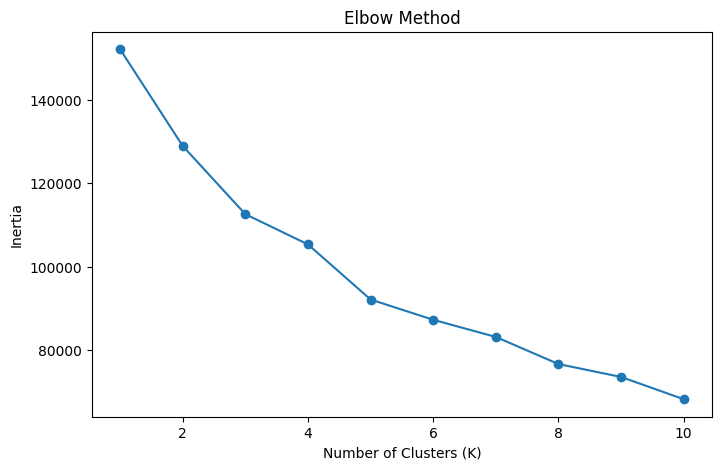

In [8]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


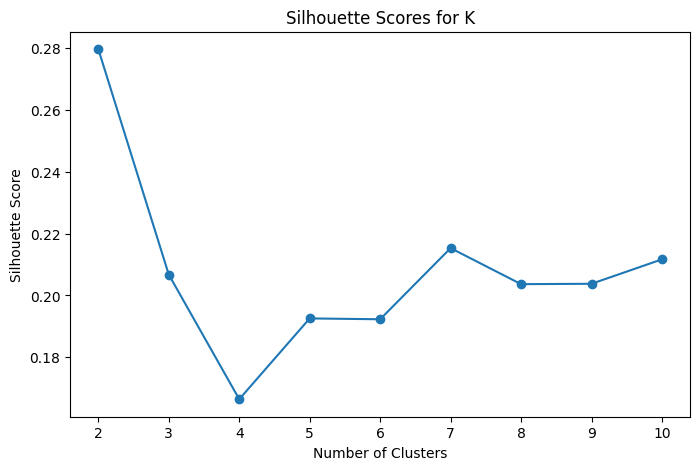

In [9]:
from sklearn.metrics import silhouette_score
sil_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores for K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Cluster Profiles
After clustering, the mean values of each cluster were analyzed to understand behavioral differences.

Using K-Means (k=10), we identified 10 distinct customer segments:
Cluster 6: Ultra-high spenders → highest business value. 
Cluster 4: High-value premium spenders. 
Cluster 1: EMI-focused responsible payers. 
Cluster 2 & 8: Mixed high spenders. 
Cluster 0, 5: Cash-advance-heavy users → high risk. 
Cluster 7 & 3: Low-activity customers → need activation. 
Cluster 9: Mid-value mixed users. 

In [10]:
cleaned_df['Cluster'] = kmeans.labels_
cleaned_df.groupby('Cluster').mean().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4543.46,0.98,354.99,230.74,124.36,3398.97,0.23,0.10,0.14,0.43,11.18,5.24,7299.21,2343.51,2098.77,0.02,11.68
1,96.03,0.89,947.18,158.04,789.27,21.82,0.84,0.08,0.78,0.00,0.07,16.81,4033.07,1070.08,184.79,0.78,11.66
2,1150.90,0.97,956.55,261.88,695.18,303.60,0.87,0.12,0.82,0.06,1.11,20.19,3491.94,1204.95,1022.37,0.05,11.89
3,1334.71,0.97,244.23,200.05,44.39,602.59,0.15,0.09,0.06,0.13,2.47,2.70,3079.05,913.44,655.82,0.02,11.89
4,3764.21,0.99,6395.07,3708.96,2687.86,629.51,0.96,0.68,0.87,0.08,2.08,94.10,9201.17,5820.20,2174.71,0.22,11.97
5,5225.15,0.96,1046.21,631.84,414.37,9564.47,0.41,0.22,0.30,0.65,28.97,14.77,9239.63,9675.10,2155.20,0.10,11.56
6,5351.55,0.95,27085.31,21002.02,6083.29,1488.36,0.89,0.81,0.71,0.06,2.40,123.32,16360.00,27159.04,3201.83,0.49,11.92
7,108.34,0.35,320.59,206.30,114.57,328.08,0.25,0.07,0.17,0.03,0.74,4.01,3838.99,1157.84,183.70,0.19,11.78
8,1233.41,0.97,2212.40,1774.73,437.67,274.80,0.89,0.80,0.42,0.05,0.94,30.65,6120.85,2169.23,468.65,0.29,11.88


# Visualizations
Several visualizations were created for cluster understanding:

PCA Cluster Plot:A 2D PCA plot was used to visually show separation of the clusters. Despite dimensionality reduction, the clusters displayed noticeable grouping.

Customer Count per Cluster: A countplot showed the distribution of customers across clusters.

Boxplots: Boxplots of key features such as:- BALANCE,PURCHASES,CASH_ADVANCE, CREDIT_LIMIT helped compare cluster-level differences.

Heatmap: A heatmap of cluster-wise mean values highlighted the magnitude of spending, payments, and credit limit differences between clusters.

# PCA Graph Insights
- Distinct clusters:
Some clusters are tightly packed and clearly separated (e.g., clusters 1, 3, 7), suggesting strong internal similarity and distinct behavior or traits.
- Overlapping clusters:
Some clusters blend into others (e.g., clusters 2 and 4), which may indicate shared characteristics or less distinct segmentation.
- Cluster size:
Larger clusters (more dots) represent dominant customer segments, while smaller ones could be niche or outlier groups.


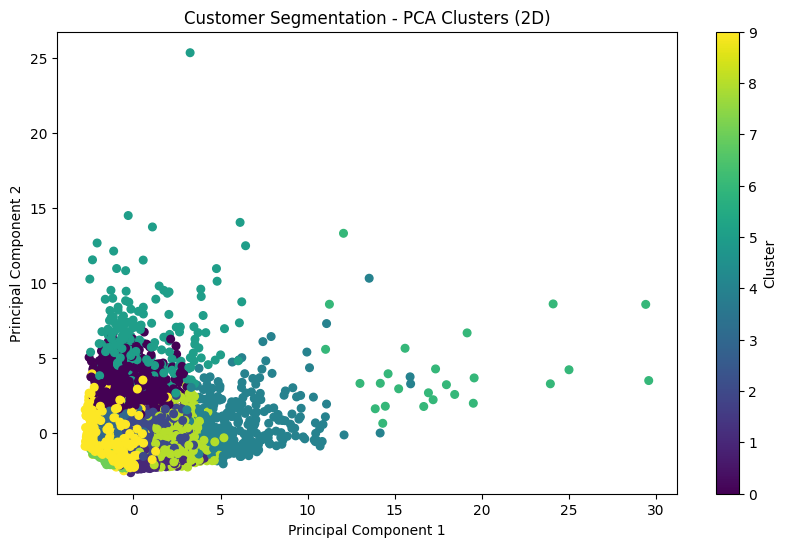

In [11]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame({
    'PC1': pca_2d[:, 0],
    'PC2': pca_2d[:, 1],
    'Cluster': cleaned_df['Cluster']
})

plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=30)
plt.title("Customer Segmentation - PCA Clusters (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Countplot of customers per cluster
Shows us that are less customers belonging to cluster 4, 5, 6 indicating less amount of customers to be profited from. Most amount of customers belong to cluster 3, this shows that these customers are likely to churn while other cluster have decent amount customers.

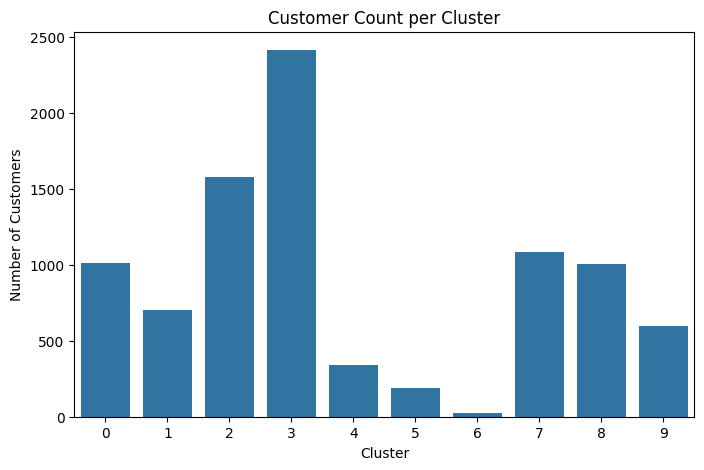

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x=cleaned_df['Cluster'])
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


# Cluster-Wise Insights by Metric
1. BALANCE by Cluster
- Cluster 6 has the highest median and widest spread → confirms ultra-high spenders.
- Clusters 3, 7 show low balance → aligns with low-activity users.
- Cluster 4 also has a high balance, reinforcing its premium status.
2. PURCHASES by Cluster
- Cluster 6 again leads with high purchases, especially one-off.
- Cluster 4 shows strong installment-based purchases.
- Clusters 3, 7 are low — minimal engagement.
3. CASH_ADVANCE by Cluster
- Clusters 0 & 5 spike here → high cash advance usage and risk.
- Others show moderate or low values.
4. CREDIT_LIMIT by Cluster
- Cluster 6 has the highest credit limit, followed by Cluster 4.
- Clusters 3, 7 have the lowest — consistent with low engagement.
5. PURCHASES_FREQUENCY by Cluster
- Clusters 1, 4, 6 show frequent purchases → active users.
- Clusters 3, 7 again show low frequency.
6. CASH_ADVANCE_FREQUENCY by Cluster
- Clusters 0 & 5 dominate again → frequent risky behavior.
- Other clusters are relatively low.


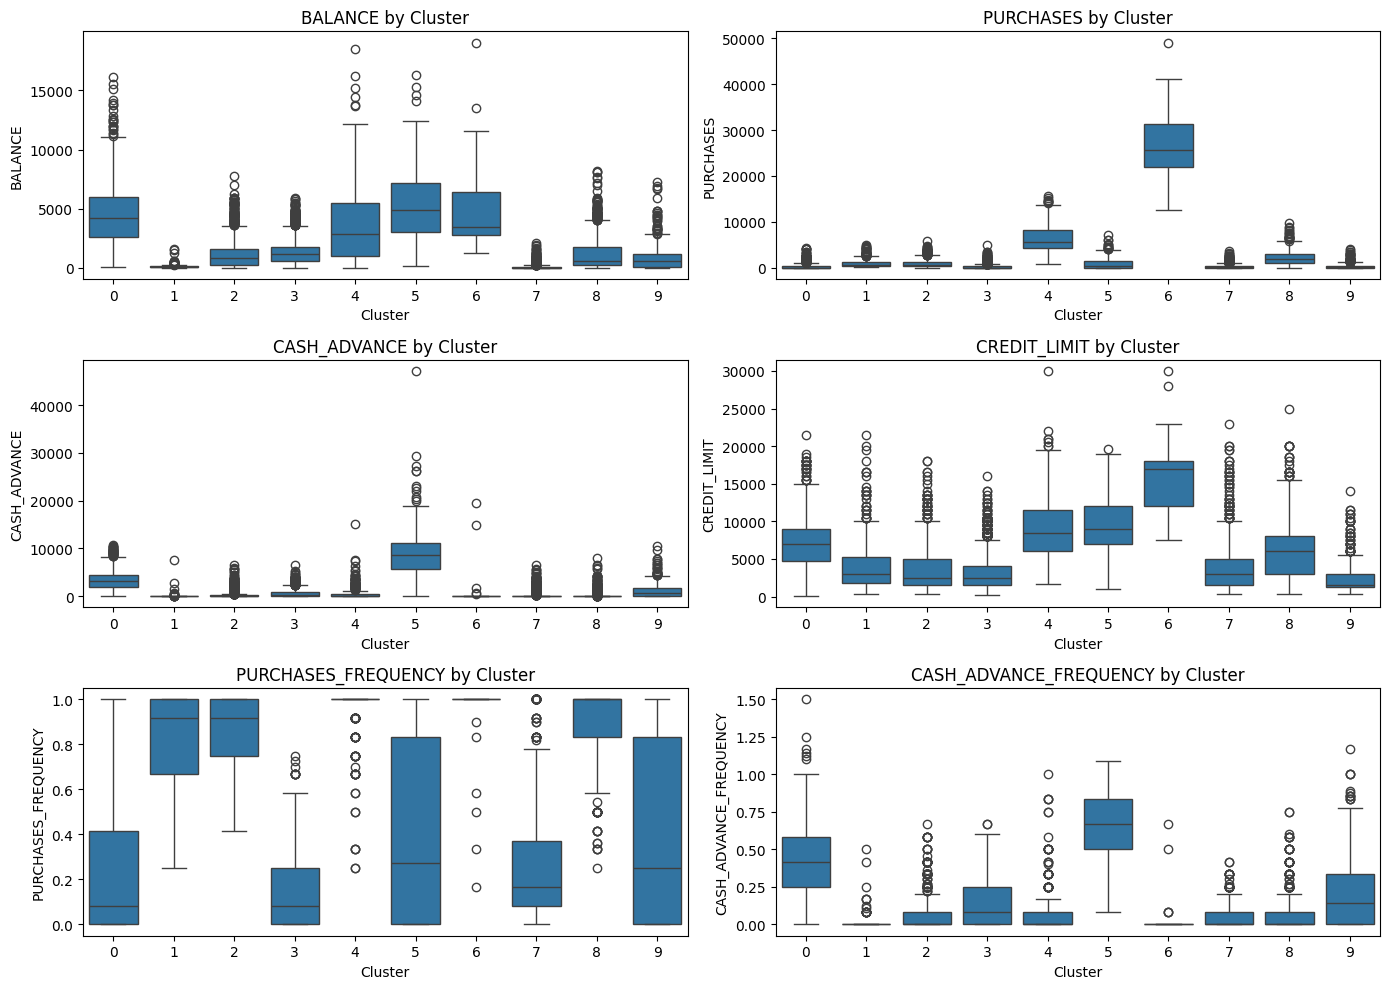

In [13]:
features = ['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT',
            'PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']

plt.figure(figsize=(14,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster', y=col, data=cleaned_df)
    plt.title(f'{col} by Cluster')
plt.tight_layout()
plt.show()

# Insights from the cluster behavior heatmap
Cluster 6 – Ultra-High Spenders
- Bright red in BALANCE, ONEOFF_PURCHASES, CREDIT_LIMIT, PAYMENTS
→ High spending, high credit, and full payments — confirms ultra-high value.

Cluster 4 – Premium Spenders
- High in BALANCE, INSTALLMENTS_PURCHASES, CREDIT_LIMIT
→ Structured spending with strong credit — fits premium profile.

Cluster 1 – EMI-Focused Payers
- High INSTALLMENTS_PURCHASES & PURCHASES_INSTALLMENTS_FREQUENCY
→ Regular installment use, moderate balance — matches EMI behavior.

Clusters 2 & 8 – Mixed High Spenders
- Moderate-to-high across PURCHASES, BALANCE, PAYMENTS
→ Diverse spending patterns, not extreme — supports “mixed” label.

Clusters 0 & 5 – Cash-Advance Heavy Users
- High CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX
→ Risk-prone behavior, possibly financial stress — clearly visible.

Clusters 3 & 7 – Low-Activity Customers
- Low across most features, especially PURCHASES and BALANCE
→ Minimal engagement — confirms need for activation

Cluster 9 – Mid-Value Mixed Users
- Moderate values across most features
→ Balanced but not standout — fits mid-value mixed profile.

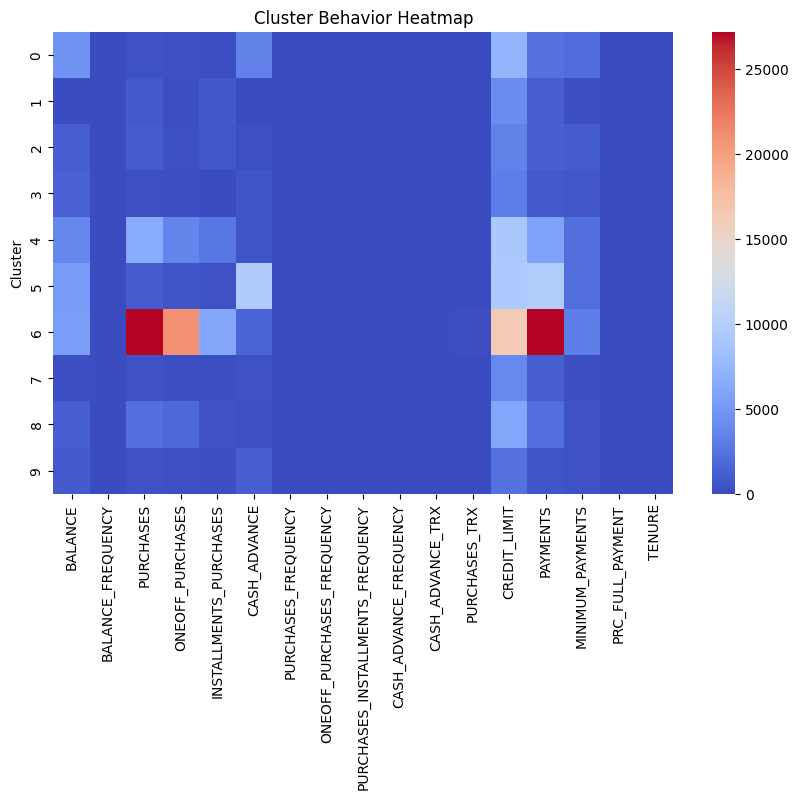

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(cleaned_df.groupby('Cluster').mean().round(2), cmap='coolwarm')
plt.title("Cluster Behavior Heatmap")
plt.show()

# Key Insights 

Clusters 0 & 5 are heavy cash-advance users, generating high interest income but also carrying high credit risk.

Clusters 1 & 8 consist of disciplined shoppers with high purchases and strong repayment habits—ideal for stable, low-risk revenue.

Clusters 4 & 6 represent super-premium customers with extremely high spending and high credit limits—your most profitable segments.

Clusters 3 & 7 show very low engagement, low transactions, and minimal revenue generation; these users risk churn.

Cluster 9 is a balanced but low-limit group, showing moderate purchase + cash advance behavior, potentially upgradable.

Cluster 2 is a mixed-profile group: regular shoppers with moderate risk and medium payments.

# Business Recommendations 
1. Manage High-Risk Segments (Clusters 0 & 5): Tighten credit checks, Offer EMIs to reduce cash advance dependence, Send repayment reminders & risk alerts.

2. Grow High-Value Segments (Clusters 4 & 6): Upgrade to premium/metal cards, Provide concierge, travel benefits, Offer exclusive partner deals & loyalty tiers.

3. Retain Low-Risk Shoppers (Clusters 1 & 8): Promote EMI offers, Give cashback on categories they frequently use, Reward on-time payment behavior.

4. Reactivate Low Engagement Users (Clusters 3 & 7):Send reactivation offers: cashback, fee waivers, Provide personalized shopping coupons, Introduce spend-based milestone rewards.

5. Upsell Developing Customers (Cluster 9 & 2): Gradually increase credit limit, Promote flexible EMIs and category-based rewards, Offer personalized product bundles.

# Conclusion

This project successfully applied K-Means clustering to segment credit card customers into meaningful groups based on their financial behavior. From data cleaning to cluster profiling, the analysis highlighted the significant differences between high-value and high-risk customer groups.

These insights can help financial institutions: Improve targeted marketing, Reduce risk exposure, Increase customer satisfaction, Personalize credit card products, The project demonstrates how unsupervised machine learning can uncover hidden patterns and guide data-driven business decisions.